In [1]:
# import os

# # Đường dẫn đến thư mục chứa các tệp ảnh
# folder_path = "Original/TuongTu"

# # Lấy danh sách các tệp trong thư mục
# file_list = os.listdir(folder_path)

# # Lặp qua từng tệp và đổi tên
# for index, filename in enumerate(file_list):
#     # Tạo tên mới với "that_tinh_" + chỉ mục
#     new_filename = f"tuong_tu_{index}{os.path.splitext(filename)[-1]}"
    
#     # new_filename = f"hello_{index}{os.path.splitext(filename)[-1]}"

#     # Đường dẫn tệp cũ và mới
#     old_filepath = os.path.join(folder_path, filename)
#     new_filepath = os.path.join(folder_path, new_filename)

#     # Đổi tên tệp
#     os.rename(old_filepath, new_filepath)

# print("Đã đổi tên các tệp ảnh thành công!")


In [2]:
import os
import shutil
from pathlib import Path
from PIL import Image

# -------------------------------Tạo các tệp cân thiết ---------------------------------------------------------
def check_folder_exist(folder_path):
    if not os.path.exists(folder_path):
        os.mkdir(folder_path)

# Đường dẫn đến thư mục nơi bộ dữ liệu gốc đã được giải nén
original_dataset_dir = Path('Original')
# Đường dẫn đến thư mục nơi bộ dữ liệu đã qua xử lý
processed_dataset_dir = Path('Processed')
check_folder_exist(processed_dataset_dir)
# Đường dẫn đến thư mục nơi bộ dữ liệu dùng để huấn luyện, xác thực và kiểm tra
base_dir = Path('Base')
check_folder_exist(base_dir)

processed_loving_dir = os.path.join(processed_dataset_dir, 'DangYeu')
check_folder_exist(processed_loving_dir)
processed_lovelorn_dir = os.path.join(processed_dataset_dir, 'ThatTinh')
check_folder_exist(processed_lovelorn_dir)
processed_lovesick_dir = os.path.join(processed_dataset_dir, 'TuongTu')
check_folder_exist(processed_lovesick_dir)

# Các thư mục cho các phần tách huấn luyện, xác thực và kiểm thử
train_dir = os.path.join(base_dir, 'train')
check_folder_exist(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
check_folder_exist(validation_dir)
test_dir = os.path.join(base_dir, 'test')
check_folder_exist(test_dir)

# Thư mục với hình ảnh đang yêu huấn luyện
train_loving_dir = os.path.join(train_dir, 'DangYeu')
check_folder_exist(train_loving_dir)

# Thư mục với hình ảnh thất tình huấn luyện
train_lovelorn_dir = os.path.join(train_dir, 'ThatTinh')
check_folder_exist(train_lovelorn_dir)

# Thư mục với hình ảnh tương tư huấn luyện
train_lovesick_dir = os.path.join(train_dir, 'TuongTu')
check_folder_exist(train_lovesick_dir)

# Thư mục với hình ảnh đang yêu xác thực
validation_loving_dir = os.path.join(validation_dir, 'DangYeu')
check_folder_exist(validation_loving_dir)

# Thư mục với hình ảnh thất tình xác thực
validation_lovelorn_dir = os.path.join(validation_dir, 'ThatTinh')
check_folder_exist(validation_lovelorn_dir)

# Thư mục với hình ảnh tương tư xác thực
validation_lovesick_dir = os.path.join(validation_dir, 'TuongTu')
check_folder_exist(validation_lovesick_dir)

# Thư mục với hình ảnh đang yêu kiểm thử
test_loving_dir = os.path.join(test_dir, 'DangYeu')
check_folder_exist(test_loving_dir)

# Thư mục với hình ảnh thất tình kiểm thử
test_lovelorn_dir = os.path.join(test_dir, 'ThatTinh')
check_folder_exist(test_lovelorn_dir)

# Thư mục với hình ảnh tương tư kiểm thử
test_lovesick_dir = os.path.join(test_dir, 'TuongTu')
check_folder_exist(test_lovesick_dir)
print("Tạo thành công!")

# ------------------------------------------------------------------------------------------------------

def convert_images_to_jpg(input_folder, output_folder):
    # Lặp qua tất cả tệp trong thư mục đầu vào
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)

        # Kiểm tra nếu tệp là hình ảnh
        if os.path.isfile(input_path) or any(input_path.lower().endswith(ext) for ext in ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.webp')):
            # Đọc và chuyển đổi hình ảnh thành định dạng JPG
            try:
                image = Image.open(input_path)
                if image.mode == 'RGBA' or image.mode == 'P':
                    image = image.convert('RGB')
                output_path = os.path.join(output_folder, os.path.splitext(filename)[0] + '.jpg')
                image.save(output_path, 'JPEG')
            except Exception as e:
                os.remove(input_path)
                print(f"Lỗi khi chuyển đổi {input_path}: {str(e)}")

# Định nghĩa các thư mục nguồn cho mỗi loại hình ảnh
source_loving_dir = os.path.join(original_dataset_dir, 'DangYeu')
source_lovelorn_dir = os.path.join(original_dataset_dir, 'ThatTinh')
source_lovesick_dir = os.path.join(original_dataset_dir, 'TuongTu')

convert_images_to_jpg(source_loving_dir, processed_loving_dir)
convert_images_to_jpg(source_lovelorn_dir, processed_lovelorn_dir)
convert_images_to_jpg(source_lovesick_dir, processed_lovesick_dir)
print("Convert done!")

# def reduce_image_size(image_path, output_path):
#   image = PIL.Image.open(image_path)
#   image.resize((640, 480), PIL.Image.ANTIALIAS)
#   image.save(output_path, quality=80)

# for image in os.listdir(source_loving_dir):
#     print(os.path.join(source_loving_dir, image))
#     reduce_image_size(os.path.join(source_loving_dir, image), os.path.join(source_loving_dir, image))
    
# for image in os.listdir(source_lovelorn_dir):
#     reduce_image_size(os.path.join(source_lovelorn_dir, image), os.path.join(source_lovelorn_dir, image))
    
# for image in os.listdir(source_lovesick_dir):
#     reduce_image_size(os.path.join(source_lovesick_dir, image), os.path.join(source_lovesick_dir, image))

# print("Resize done!")



# Lấy danh sách các tệp hình ảnh trong từng thư mục đã qua xử lý
loving_images = os.listdir(processed_loving_dir)
lovelorn_images = os.listdir(processed_lovelorn_dir)
lovesick_images = os.listdir(processed_lovesick_dir)

# Tính số lượng hình ảnh cho từng tập dữ liệu
loving_images_count = len(loving_images)
lovelorn_images_count = len(lovelorn_images)
lovesick_images_count = len(lovesick_images)

train_loving_count = int(loving_images_count * 0.7)
validation_loving_count = int(loving_images_count * 0.2)
test_loving_count = loving_images_count - train_loving_count - validation_loving_count

train_lovelorn_count = int(lovelorn_images_count * 0.7)
validation_lovelorn_count = int(lovelorn_images_count * 0.2)
test_lovelorn_count = lovelorn_images_count - train_lovelorn_count - validation_lovelorn_count

train_lovesick_count = int(lovesick_images_count * 0.7)
validation_lovesick_count = int(lovesick_images_count * 0.2)
test_lovesick_count = lovesick_images_count - train_lovesick_count - validation_lovesick_count

# Di chuyển hình ảnh vào các thư mục tương ứng
for image in loving_images[:train_loving_count]:
    source = os.path.join(processed_loving_dir, image)
    destination = os.path.join(train_loving_dir, image)
    shutil.copy(source, destination)

for image in loving_images[train_loving_count:train_loving_count + validation_loving_count]:
    source = os.path.join(processed_loving_dir, image)
    destination = os.path.join(validation_loving_dir, image)
    shutil.copy(source, destination)

for image in loving_images[train_loving_count + validation_loving_count:train_loving_count + validation_loving_count + test_loving_count]:
    source = os.path.join(processed_loving_dir, image)
    destination = os.path.join(test_loving_dir, image)
    shutil.copy(source, destination)
    
for image in lovelorn_images[:train_lovelorn_count]:
    source = os.path.join(processed_lovelorn_dir, image)
    destination = os.path.join(train_lovelorn_dir, image)
    shutil.copy(source, destination)

for image in lovelorn_images[train_lovelorn_count:train_lovelorn_count + validation_lovelorn_count]:
    source = os.path.join(processed_lovelorn_dir, image)
    destination = os.path.join(validation_lovelorn_dir, image)
    shutil.copy(source, destination)

for image in lovelorn_images[train_lovelorn_count + validation_lovelorn_count:train_lovelorn_count + validation_lovelorn_count + test_lovelorn_count]:
    source = os.path.join(processed_lovelorn_dir, image)
    destination = os.path.join(test_lovelorn_dir, image)
    shutil.copy(source, destination)
    
for image in lovesick_images[:train_lovesick_count]:
    source = os.path.join(processed_lovesick_dir, image)
    destination = os.path.join(train_lovesick_dir, image)
    shutil.copy(source, destination)

for image in lovesick_images[train_lovesick_count:train_lovesick_count + validation_lovesick_count]:
    source = os.path.join(processed_lovesick_dir, image)
    destination = os.path.join(validation_lovesick_dir, image)
    shutil.copy(source, destination)

for image in lovesick_images[train_lovesick_count + validation_lovesick_count:train_lovesick_count + validation_lovesick_count + test_lovesick_count]:
    source = os.path.join(processed_lovesick_dir, image)
    destination = os.path.join(test_lovesick_dir, image)
    shutil.copy(source, destination)

print("Chia tập dữ liệu thành công!")


Tạo thành công!
Convert done!
Chia tập dữ liệu thành công!


In [3]:
print('total training loving images:', len(os.listdir(train_loving_dir)))
print('total validation loving images:', len(os.listdir(validation_loving_dir)))
print('total test loving images:', len(os.listdir(test_loving_dir)))

print('total training lovelorn images:', len(os.listdir(train_lovelorn_dir)))
print('total validation lovelorn images:', len(os.listdir(validation_lovelorn_dir)))
print('total test lovelorn images:', len(os.listdir(test_lovelorn_dir)))

print('total training lovesick images:', len(os.listdir(train_lovesick_dir)))
print('total validation lovesick images:', len(os.listdir(validation_lovesick_dir)))
print('total test lovesick images:', len(os.listdir(test_lovesick_dir)))

total training loving images: 234
total validation loving images: 67
total test loving images: 34
total training lovelorn images: 186
total validation lovelorn images: 53
total test lovelorn images: 28
total training lovesick images: 152
total validation lovesick images: 43
total test lovesick images: 23


Found 820 files belonging to 3 classes.
Using 656 files for training.
Found 820 files belonging to 3 classes.
Using 164 files for validation.
Found 820 files belonging to 3 classes.
Epoch 1/100
164/164 [==============================] - 57s 339ms/step - loss: 26.2519 - accuracy: 0.6402 - val_loss: 0.8264 - val_accuracy: 0.6951
Epoch 2/100
164/164 [==============================] - 54s 328ms/step - loss: 0.7952 - accuracy: 0.7088 - val_loss: 0.8091 - val_accuracy: 0.6951
Epoch 3/100
164/164 [==============================] - 56s 339ms/step - loss: 0.9358 - accuracy: 0.7134 - val_loss: 0.8364 - val_accuracy: 0.6890
Epoch 4/100
164/164 [==============================] - 55s 335ms/step - loss: 0.7492 - accuracy: 0.7210 - val_loss: 0.8044 - val_accuracy: 0.6890
Epoch 5/100
164/164 [==============================] - 58s 356ms/step - loss: 0.7183 - accuracy: 0.7348 - val_loss: 0.8138 - val_accuracy: 0.7012
Epoch 6/100
164/164 [==============================] - 55s 337ms/step - loss: 0.7205 - 

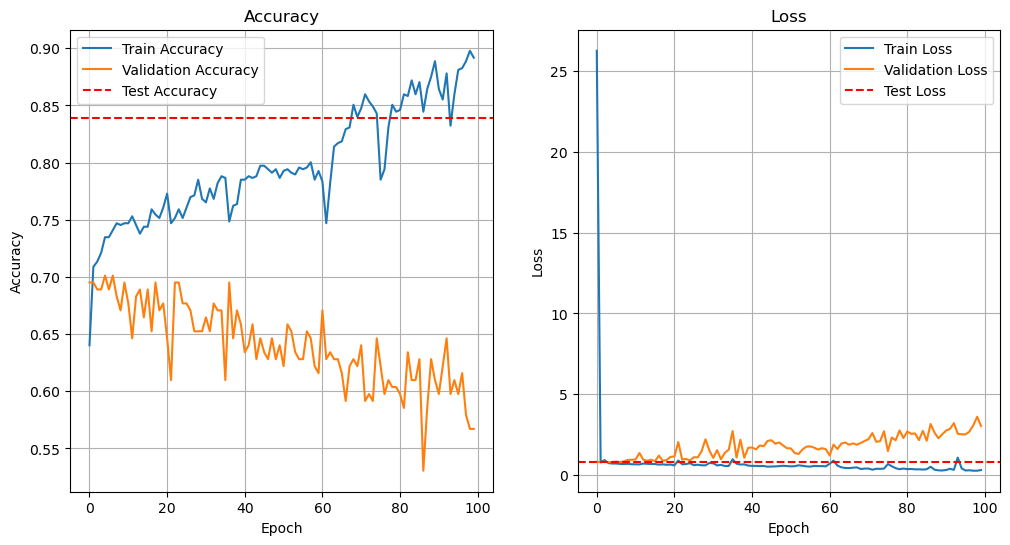

Test loss: 0.7934505343437195
Test accuracy: 0.8390243649482727


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load dữ liệu training và validation
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    image_size=(150, 150),
    batch_size=4,
    validation_split=0.2,
    subset='training',
    seed=42
)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    image_size=(150, 150),
    batch_size=4,
    validation_split=0.2,
    subset='validation',
    seed=42
)

# Đánh giá mô hình trên tập dữ liệu test
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    image_size=(150, 150),
    batch_size=4,
)

# Tạo mô hình
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(128, (3, 3), activation='relu'))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Flatten())
model_1.add(Dropout(0.2))
model_1.add(Dense(512, activation='relu'))
model_1.add(Dense(3, activation='softmax'))

# Compile mô hình
model_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Sử dụng AUGMENTATION
datagen = ImageDataGenerator(
    rotation_range=40, #góc xoay ngẫu nhiên
    width_shift_range=0.2, #dịch chuyển ngẫu nhiên theo chiều dọc và ngang
    height_shift_range=0.2, 
    shear_range=0.2,#cắt
    zoom_range=0.2, 
    horizontal_flip=True, #lật ngang ngẫu nhiên
    fill_mode='nearest' #sử dụng 'nearest' để điền giá trị gần nhất cho các pixel
)

# Đào tạo mô hình với tăng cường dữ liệu
history = model_1.fit(datagen.flow(train_dataset), epochs=100, validation_data=validation_dataset)

# Lấy thông tin accuracy và loss của tập kiểm tra
test_loss, test_accuracy = model_1.evaluate(test_dataset)

# Tạo biểu đồ so sánh
plt.figure(figsize=(12, 6))

# Biểu đồ Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Biểu đồ Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

In [7]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

# Đường dẫn đến thư mục chứa ảnh cần dự đoán
img_path = 'Original/DangYeu'

# Lặp qua tất cả các tệp hình ảnh trong thư mục
for filename in os.listdir(img_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Đường dẫn đầy đủ đến tệp ảnh
        img_full_path = os.path.join(img_path, filename)

        # Đọc ảnh và điều chỉnh kích thước
        img = image.load_img(img_full_path, target_size=(150, 150))

        # Chuyển ảnh thành mảng numpy và mở rộng để phù hợp với kích thước đầu vào của mô hình
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Chuẩn hóa ảnh tương tự như trong quá trình đào tạo (nếu cần)
        # img_array /= 255.0  # Chuẩn hóa các giá trị pixel trong khoảng [0, 1]

        # Dự đoán nhãn
        predictions = model_1.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)[0]

        # Dự đoán xem ảnh thuộc nhóm nào
        class_names = ['DangYeu', 'ThatTinh', 'TuongTu']
        predicted_label = class_names[predicted_class]

        print(f'Predicted label for {filename}: {predicted_label}')


1/1 [==============================] - 0s 109ms/step
Predicted label for dang_yeu_0.jpg: TuongTu
1/1 [==============================] - 0s 23ms/step
Predicted label for dang_yeu_1.jpg: ThatTinh
1/1 [==============================] - 0s 32ms/step
Predicted label for dang_yeu_10.jpg: ThatTinh
1/1 [==============================] - 0s 34ms/step
Predicted label for dang_yeu_100.jpg: ThatTinh
1/1 [==============================] - 0s 34ms/step
Predicted label for dang_yeu_101.jpg: ThatTinh
1/1 [==============================] - 0s 30ms/step
Predicted label for dang_yeu_102.jpg: ThatTinh
1/1 [==============================] - 0s 33ms/step
Predicted label for dang_yeu_103.png: ThatTinh
1/1 [==============================] - 0s 39ms/step
Predicted label for dang_yeu_105.jpg: ThatTinh
1/1 [==============================] - 0s 30ms/step
Predicted label for dang_yeu_106.png: ThatTinh
1/1 [==============================] - 0s 27ms/step
Predicted label for dang_yeu_107.jpg: DangYeu
1/1 [===========

1/1 [==============================] - 0s 31ms/step
Predicted label for dang_yeu_187.jpg: ThatTinh
1/1 [==============================] - 0s 32ms/step
Predicted label for dang_yeu_188.jpg: ThatTinh
1/1 [==============================] - 0s 26ms/step
Predicted label for dang_yeu_189.jpg: ThatTinh
1/1 [==============================] - 0s 27ms/step
Predicted label for dang_yeu_19.jpg: ThatTinh
1/1 [==============================] - 0s 30ms/step
Predicted label for dang_yeu_190.jpg: ThatTinh
1/1 [==============================] - 0s 16ms/step
Predicted label for dang_yeu_191.jpg: ThatTinh
1/1 [==============================] - 0s 22ms/step
Predicted label for dang_yeu_192.jpg: ThatTinh
1/1 [==============================] - 0s 30ms/step
Predicted label for dang_yeu_193.jpg: ThatTinh
1/1 [==============================] - 0s 29ms/step
Predicted label for dang_yeu_194.jpg: ThatTinh
1/1 [==============================] - 0s 36ms/step
Predicted label for dang_yeu_195.jpg: ThatTinh
1/1 [======

1/1 [==============================] - 0s 31ms/step
Predicted label for dang_yeu_269.jpg: ThatTinh
1/1 [==============================] - 0s 29ms/step
Predicted label for dang_yeu_27.jpg: ThatTinh
1/1 [==============================] - 0s 34ms/step
Predicted label for dang_yeu_270.jpg: DangYeu
1/1 [==============================] - 0s 40ms/step
Predicted label for dang_yeu_271.jpg: ThatTinh
1/1 [==============================] - 0s 36ms/step
Predicted label for dang_yeu_272.jpg: ThatTinh
1/1 [==============================] - 0s 27ms/step
Predicted label for dang_yeu_273.jpg: ThatTinh
1/1 [==============================] - 0s 36ms/step
Predicted label for dang_yeu_274.jpg: ThatTinh
1/1 [==============================] - 0s 39ms/step
Predicted label for dang_yeu_275.jpg: ThatTinh
1/1 [==============================] - 0s 36ms/step
Predicted label for dang_yeu_276.jpg: ThatTinh
1/1 [==============================] - 0s 37ms/step
Predicted label for dang_yeu_277.jpg: ThatTinh
1/1 [=======

Epoch 1/30
164/164 [==============================] - 78s 468ms/step - loss: 29.8680 - accuracy: 0.6509 - val_loss: 0.8703 - val_accuracy: 0.6951
Epoch 2/30
164/164 [==============================] - 89s 540ms/step - loss: 0.7921 - accuracy: 0.7043 - val_loss: 0.8288 - val_accuracy: 0.6829
Epoch 3/30
164/164 [==============================] - 87s 529ms/step - loss: 0.6779 - accuracy: 0.7332 - val_loss: 0.9137 - val_accuracy: 0.6829
Epoch 4/30
164/164 [==============================] - 93s 568ms/step - loss: 0.7517 - accuracy: 0.7668 - val_loss: 1.0591 - val_accuracy: 0.6159
Epoch 5/30
164/164 [==============================] - 94s 573ms/step - loss: 1.1374 - accuracy: 0.7424 - val_loss: 0.9192 - val_accuracy: 0.6707
Epoch 6/30
164/164 [==============================] - 95s 576ms/step - loss: 0.9811 - accuracy: 0.7561 - val_loss: 1.2513 - val_accuracy: 0.6707
Epoch 7/30
164/164 [==============================] - 91s 553ms/step - loss: 0.6232 - accuracy: 0.7744 - val_loss: 1.1675 - val_a

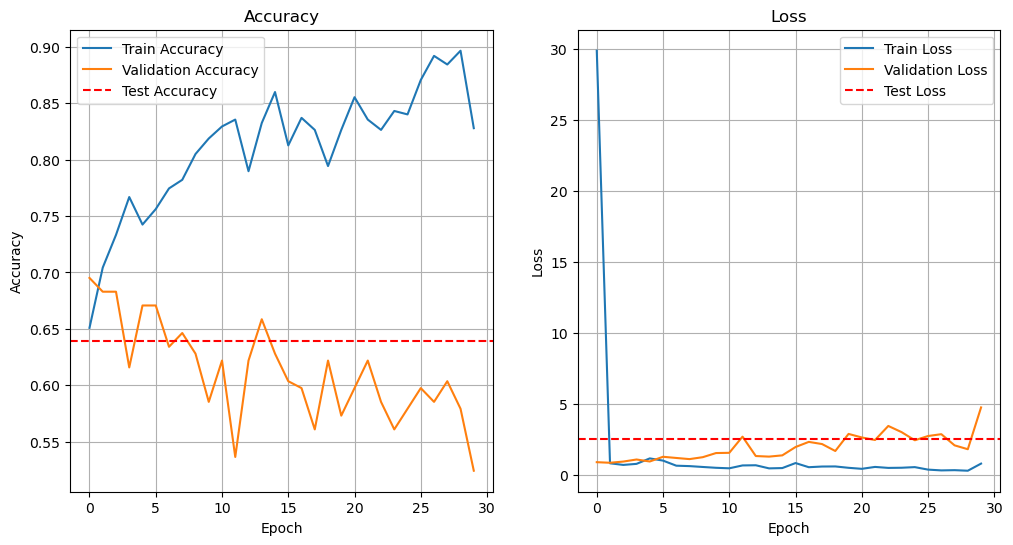

Test loss: 2.4859812259674072
Test accuracy: 0.6390243768692017


In [8]:
# Mô hình 2
model_2 = Sequential()
model_2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(128, (3, 3), activation='relu'))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(256, (3, 3), activation='relu'))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Flatten())
model_2.add(Dropout(0.2))
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(3, activation='softmax'))
            
# Compile mô hình
model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Đào tạo mô hình
history = model_2.fit(train_dataset, epochs=30, validation_data=validation_dataset)

# Lấy thông tin accuracy và loss của tập kiểm tra
test_loss, test_accuracy = model_2.evaluate(test_dataset)

# Tạo biểu đồ so sánh
plt.figure(figsize=(12, 6))

# Biểu đồ Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Biểu đồ Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Epoch 1/30
164/164 [==============================] - 29s 171ms/step - loss: 15.0336 - accuracy: 0.6265 - val_loss: 0.8893 - val_accuracy: 0.6829
Epoch 2/30
164/164 [==============================] - 28s 173ms/step - loss: 0.8115 - accuracy: 0.7104 - val_loss: 0.9379 - val_accuracy: 0.6585
Epoch 3/30
164/164 [==============================] - 31s 189ms/step - loss: 0.6303 - accuracy: 0.7530 - val_loss: 1.1994 - val_accuracy: 0.6524
Epoch 4/30
164/164 [==============================] - 32s 192ms/step - loss: 0.6466 - accuracy: 0.7759 - val_loss: 1.1089 - val_accuracy: 0.6159
Epoch 5/30
164/164 [==============================] - 31s 189ms/step - loss: 0.6737 - accuracy: 0.7683 - val_loss: 1.0535 - val_accuracy: 0.6402
Epoch 6/30
164/164 [==============================] - 30s 182ms/step - loss: 0.5243 - accuracy: 0.8034 - val_loss: 1.0647 - val_accuracy: 0.6280
Epoch 7/30
164/164 [==============================] - 29s 177ms/step - loss: 0.4863 - accuracy: 0.8338 - val_loss: 1.3552 - val_a

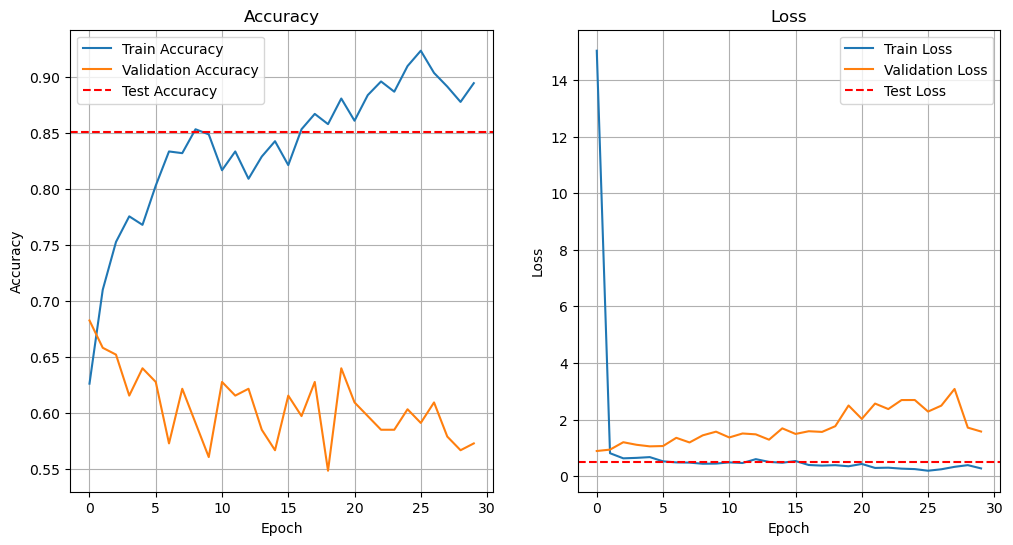

Test loss: 0.49038639664649963
Test accuracy: 0.8512195348739624


In [9]:
# Mô hình 3
model_3 = Sequential()
model_3.add(Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Conv2D(32, (3, 3), activation='relu'))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Flatten())
model_3.add(Dropout(0.2))
model_3.add(Dense(512, activation='relu'))
model_3.add(Dense(3, activation='softmax'))
            
# Compile mô hình
model_3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Đào tạo mô hình
history = model_3.fit(train_dataset, epochs=30, validation_data=validation_dataset)

# Lấy thông tin accuracy và loss của tập kiểm tra
test_loss, test_accuracy = model_3.evaluate(test_dataset)

# Tạo biểu đồ so sánh
plt.figure(figsize=(12, 6))

# Biểu đồ Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Biểu đồ Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)